In [1]:
%matplotlib inline

In [2]:
run phasediag.py

qR = 0.075, q = 0.078, Cov = 2.087 mg/g
At critical point colloid volume fraction is 0.520 and osmotic insertion work is 503.081 kT
tie line Gas-Solid
3.40152108798e-05 0.624739653238
0.722831684246 0.0726528862772
tie line Gas-Liquid
0.0635070089791 0.575022149777
0.605513148533 0.155580533234


/home/mathieu/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


/home/mathieu/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


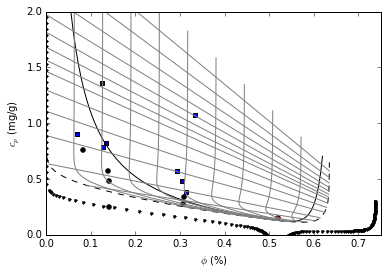

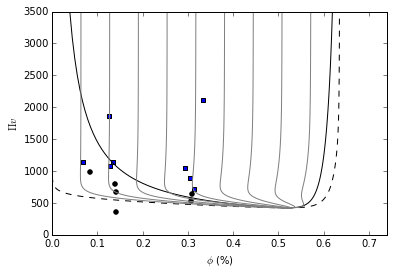

In [3]:
show()

In [4]:
from scipy.misc import derivative

In [5]:
fluid = Liu()
solid = Hall()
Delta_muS_0 = solid.mu_of_U(np.log(1/1.185-1/f_cp), 0, q) - fluid.mu_of_U(np.log(1/0.970-1/f_cp), 0, q)
piv = xp2th(cpxpG, phixpG, qR, cpov)[-3]
print(piv)
phis = np.linspace(0,0.73,100)
fs = vf2f(phis)

722.52750882


In [ ]:
dodphi = derivative(lambda phi: fluid.pv(vf2f(phi), piv, q), phixpG[-3], dx=1e-6)

In [6]:
phi0, fF0, fS0 = FS[np.where(FS[:,0]>piv)[0][0]]
fF, fS = coexistence(piv, q, fluid, solid, FS[np.where(FS[:,0]>piv)[0][0],1:], Delta_muS_0)

In [ ]:
axvspan(f2vf(fS),0.74, color=[0.9]*3)
plot(phis, fluid.pv(fs, piv, q))
plot(phis, solid.pv(fs, piv, q), ls='--')
xlim(0,0.74)
ylim(690, 725)
axvline(phixpG[-3])
plot(phis, dodphi * (phis-phixpG[-3]) + fluid.pv(vf2f(phixpG[-3]), piv, q))

In [ ]:
plot(phis, fluid.pv(fs, piv, q))
xlim(0,0.6)
ylim(718, 723)
axvline(phixpG[-3])
plot(phis, dodphi * (phis-phixpG[-3]) + fluid.pv(vf2f(phixpG[-3]), piv, q))

In [ ]:
philog = np.unique(np.concatenate((phis[1:], np.logspace(-7,np.log10(0.74)))))
plot(philog, fluid.pv(vf2f(philog), piv, q))
xscale('log')
ylim(718, 724)
axvline(phixpG[-3])
plot(philog, dodphi * (philog-phixpG[-3]) + fluid.pv(vf2f(phixpG[-3]), piv, q))

In [ ]:
f2vf(fF)

In [ ]:
omega0 lambda f: f2vf(f)*(np.log(f2vf(f)) -1 +4*f + f**2)


/home/mathieu/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/home/mathieu/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/mathieu/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed th

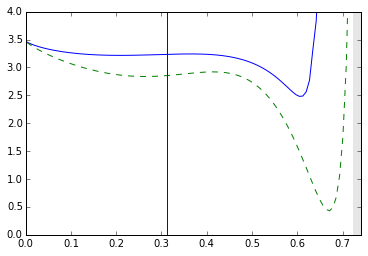

In [23]:
fslog = np.unique(np.concatenate((np.linspace(-6,np.log(0.74), endpoint=False), np.log(fs[10:-1]))))
philog = f2vf(np.exp(fslog))
axvspan(f2vf(fS),0.74, color=[0.9]*3)
axvspan(0,f2vf(fF), color=[0.9]*3)
plot(philog, fluid.omega_of_log(fslog, piv, q)- 905*philog+726)
plot(philog, solid.omega_of_log(fslog, piv, q)- 905*philog+726, ls='--')
#xlim(0,0.74)
#xscale('log')
xlim(1e-3,0.74)
ylim(0,4)
axvline(phixpG[-3])
#plot(phis, dodphi * (phis-phixpG[-3]) + fluid.pv(vf2f(phixpG[-3]), piv, q))